In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install numpy tensorflow keras matplotlib keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


In [3]:
!pip install keras-layer-normalization

  Preparing metadata (setup.py) ... done
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.16.0-py3-none-any.whl size=4654 sha256=dbc461da046e89d63261ff9f501ee2e2084b2a9c0d78a07b571375eb45f43725
  Stored in directory: /root/.cache/pip/wheels/ed/3a/4b/21db23c0cc56c4b219616e181f258eb7c57d36cc5d056fae9a
Successfully built keras-layer-normalization


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization  # Corrected import
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Corrected import


In [5]:
train_dir="/content/drive/MyDrive/Mini Project/face_data/Original Images/Original Images"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())


Found 2562 images belonging to 31 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [7]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
from tensorflow.keras.callbacks import Callback

class PrintAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch+1}/{self.params["epochs"]}, Accuracy: {logs["accuracy"]*100:.2f}%')

history = model.fit(train_ds, epochs=30, batch_size=32, callbacks=[PrintAccuracyCallback()])


Epoch 1/30
81/81 [==============================] - 1262s 15s/step - loss: 3.4517 - accuracy: 0.0898
Epoch 2/30
81/81 [==============================] - 282s 3s/step - loss: 2.7187 - accuracy: 0.2143
Epoch 3/30
81/81 [==============================] - 287s 4s/step - loss: 2.2874 - accuracy: 0.3220
Epoch 4/30
81/81 [==============================] - 279s 3s/step - loss: 1.8456 - accuracy: 0.4543
Epoch 5/30
81/81 [==============================] - 289s 4s/step - loss: 1.5565 - accuracy: 0.5445
Epoch 6/30
81/81 [==============================] - 282s 3s/step - loss: 1.3454 - accuracy: 0.5925
Epoch 7/30
81/81 [==============================] - 289s 4s/step - loss: 1.0539 - accuracy: 0.6862
Epoch 8/30
81/81 [==============================] - 282s 3s/step - loss: 0.8356 - accuracy: 0.7568
Epoch 9/30
81/81 [==============================] - 289s 4s/step - loss: 0.6024 - accuracy: 0.8263
Epoch 10/30
81/81 [==============================] - 280s 3s/step - loss: 0.5876 - accuracy: 0.8349
Epoch 1

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Saved Models/faceCNN.hdf5')

In [ ]:
#history = model.fit(train_ds,epochs= 10, batch_size=32)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [ ]:
from PIL import Image

In [ ]:
def predict_image(image_path):
  # Open image with Pillow's Image.open and resize using target_size
  img = Image.open(image_path).resize((224, 224), Image.ANTIALIAS)
  plt.imshow(img)
  plt.show()
  # Convert image to numpy array
  x = np.array(img)
  # Reshape for model prediction with batch dimension
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  pred = model.predict(images, batch_size=32)
  print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
  print("Predicted: "+classes[np.argmax(pred)])

<ipython-input-22-b861b04ad1f5>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = Image.open(image_path).resize((224, 224), Image.ANTIALIAS)


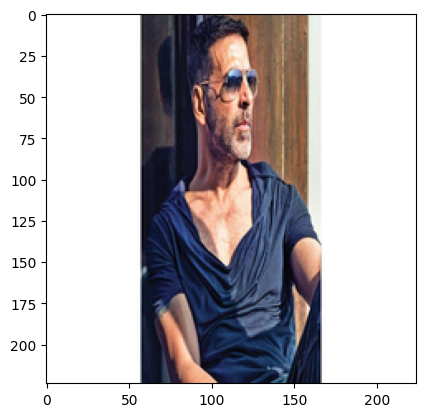

1/1 [==============================] - 0s 227ms/step
Actual: Akshay Kumar
Predicted: Akshay Kumar


In [ ]:
predict_image("/content/drive/MyDrive/Mini Project/face_data/Original Images/Original Images/Akshay Kumar/Akshay Kumar_12.jpg")

<ipython-input-22-b861b04ad1f5>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = Image.open(image_path).resize((224, 224), Image.ANTIALIAS)


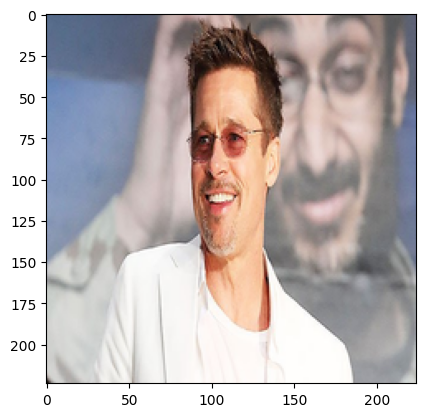

1/1 [==============================] - 0s 47ms/step
Actual: Brad Pitt
Predicted: Andy Samberg


In [ ]:
predict_image("/content/drive/MyDrive/Mini Project/face_data/Original Images/Original Images/Brad Pitt/Brad Pitt_11.jpg")

<ipython-input-22-b861b04ad1f5>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = Image.open(image_path).resize((224, 224), Image.ANTIALIAS)


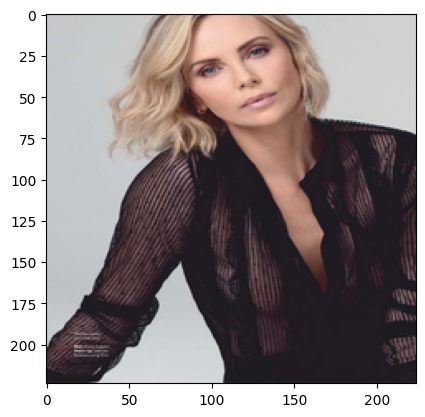

1/1 [==============================] - 0s 43ms/step
Actual: Charlize Theron
Predicted: Charlize Theron


In [ ]:
predict_image("/content/drive/MyDrive/Mini Project/face_data/Original Images/Original Images/Charlize Theron/Charlize Theron_26.jpg")

<ipython-input-22-b861b04ad1f5>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = Image.open(image_path).resize((224, 224), Image.ANTIALIAS)


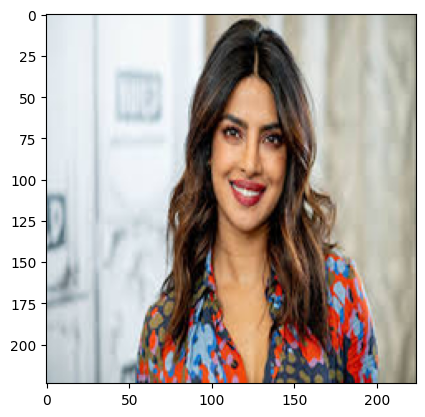

1/1 [==============================] - 0s 48ms/step
Actual: p1.jpeg
Predicted: Priyanka Chopra


In [ ]:
predict_image("/p1.jpeg")